In [1]:
import yfinance as yf

# 下載股票數據，這裡以AAPL為例
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")


[*********************100%***********************]  1 of 1 completed


In [2]:
# 計算短期和長期移動平均線
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

In [3]:
# 訊號：SMA_50 > SMA_200 -> 買入 (1)，SMA_50 < SMA_200 -> 賣出 (-1)
data['Signal'] = 0
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1
data.loc[data['SMA_50'] < data['SMA_200'], 'Signal'] = -1


In [4]:
# 計算日收益率
data['Returns'] = data['Close'].pct_change()

In [5]:
# 計算策略的收益：當 Signal = 1（持有）時，收益等於 Returns；當 Signal = -1（賣出）時，收益為零
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']


In [6]:
# 計算累積收益
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()


In [7]:
# 顯示結果
print(data[['Cumulative_Market_Returns', 'Cumulative_Strategy_Returns']].tail())


            Cumulative_Market_Returns  Cumulative_Strategy_Returns
Date                                                              
2022-12-23                   1.756085                     1.054566
2022-12-27                   1.731713                     1.069202
2022-12-28                   1.678575                     1.102010
2022-12-29                   1.726120                     1.070797
2022-12-30                   1.730381                     1.068153


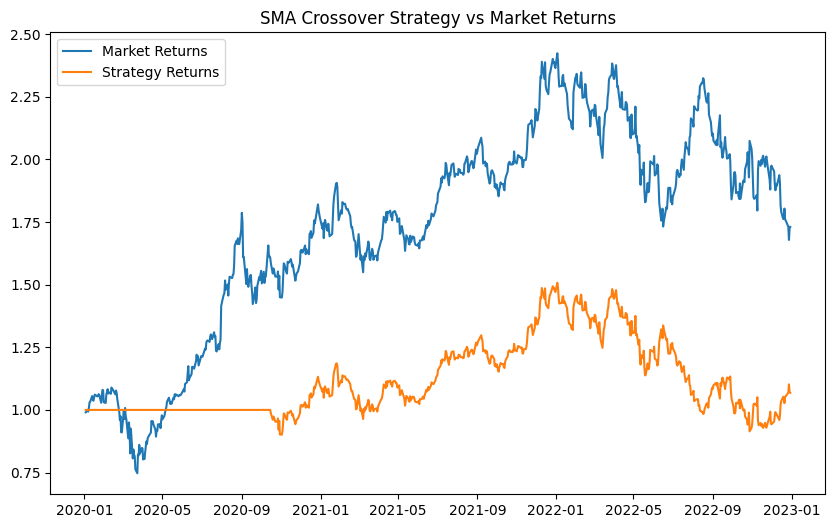

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title('SMA Crossover Strategy vs Market Returns')
plt.legend()
plt.show()
